## Neutrino spectrum and cross sections

https://github.com/mhostert/solar-neutrino-visible-decays

In [3]:
import numpy as np
from scipy import interpolate
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *

import vegas
import gvar as gv

from source import * 

In [4]:
##########
# integration evaluations
rates.NEVALwarmup = 1e5
rates.NEVAL = 1e5

###########
# NU FLUX
fluxfile = "fluxes/b8spectrum.txt"
flux, flux3h, flux3l = fluxes.get_neutrino_flux(fluxfile, get_3sigma=True)

############
# NUE/BAR XS
xsfile="xsecs/IBD_160106169/TCS_CC_anue_p_1026_SV.txt"
xsec = lambda x : np.zeros(np.size(x)) 
xsecbar = lambda x: np.ones(np.size(x))*1e-38

bins = np.linspace(0.0,14.5,50)
dx = (bins[1:] - bins[:-1])
bin_c = bins[:-1] + dx/2.0

#############
# efficiencies
enu_eff= bins
eff= np.ones((np.size(bins)-1))
identity = lambda x : x

############
# DECAY MODEL PARAMETERS
params = model.decay_model_params(const.SCALAR)
params.gx = 1.0
params.Ue4 = np.sqrt(0.01)
params.Umu4 = np.sqrt(0.001)*0
params.UD4 = np.sqrt(1.0-params.Ue4*params.Ue4-params.Umu4*params.Umu4)
params.m4 = 300e-9 # GeV

params.mBOSON  = 0.9*params.m4 # GeV
NCASCADE, dNCASCADE = rates.RATES_dN_HNL_CASCADE_NU_NUBAR(\
                                            flux=flux,\
                                            xsec=xsec,\
                                            xsecbar=xsecbar,\
                                            dim=3,\
                                            enumin=0,\
                                            enumax=const.Enu_END_OF_SPECTRUM,\
                                            params=params,\
                                            bins=bins,\
                                            PRINT=True,\
                                            enu_eff=enu_eff,\
                                            eff=eff,
                                            smearing_function=identity)


itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   3.29176(54)e-34 3.29176(54)e-34     0.00     1.00
  2   3.29165(50)e-34 3.29168(37)e-34     0.70     0.94
  3   3.29234(46)e-34 3.29199(29)e-34     1.11     0.20
  4   3.29279(52)e-34 3.29215(25)e-34     1.05     0.31
  5   3.29197(48)e-34 3.29212(22)e-34     1.04     0.33
  6   3.29196(52)e-34 3.29210(20)e-34     1.19     0.02
  7   3.29193(53)e-34 3.29208(19)e-34     1.16     0.03
  8   3.29198(50)e-34 3.29205(18)e-34     1.14     0.03
  9   3.29149(50)e-34 3.29199(17)e-34     1.12     0.06
 10   3.29190(53)e-34 3.29199(16)e-34     1.08     0.12
 11   3.29244(52)e-34 3.29203(15)e-34     1.06     0.18
 12   3.29157(59)e-34 3.29200(15)e-34     1.07     0.13
 13   3.29175(50)e-34 3.29198(14)e-34     1.05     0.18
 14   3.29234(51)e-34 3.29201(14)e-34     1.08     0.07
 15   3.29201(59)e-34 3.29200(13)e-34     1.12     0.01
 16   3.29177(54)e-34 3.29198(13)e-34     1.09  

In [5]:
############
# NUE/BAR XS
xsfile="xsecs/IBD_160106169/TCS_CC_anue_p_1026_SV.txt"
xsecSV = xsecs.get_IBD(xsfile)

xsec_nuebar_ES = xsecs.get_nuES(pdg.PDG_nuebar)
xsec_nue_ES = xsecs.get_nuES(pdg.PDG_nue)

/Users/matheushostert/Repos/solar-neutrino-visible-decays/source/xsecs.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return units*prefactor*((CL**2+CR**2)*(t1-T0) - CR**2/E*(t1**2 - T0**2) + CR**2/3/E/E*(t1**3 - T0**3) - CL*CR*const.Me*(t1**2-T0**2)/2/E/E)
/Users/matheushostert/Repos/solar-neutrino-visible-decays/source/xsecs.py:55: RuntimeWarning: invalid value encountered in multiply
  return units*prefactor*((CL**2+CR**2)*(t1-T0) - CR**2/E*(t1**2 - T0**2) + CR**2/3/E/E*(t1**3 - T0**3) - CL*CR*const.Me*(t1**2-T0**2)/2/E/E)
/Users/matheushostert/Repos/solar-neutrino-visible-decays/source/xsecs.py:55: RuntimeWarning: invalid value encountered in true_divide
  return units*prefactor*((CL**2+CR**2)*(t1-T0) - CR**2/E*(t1**2 - T0**2) + CR**2/3/E/E*(t1**3 - T0**3) - CL*CR*const.Me*(t1**2-T0**2)/2/E/E)
/Users/matheushostert/Repos/solar-neutrino-visible-decays/source/xsecs.py:55: RuntimeWarning: divide by zero encountered in true_divide
  return units*prefactor*((CL**2+CR

[1.83492524e-35 1.90875116e-35 1.89492668e-35 1.88209527e-35
 1.84933227e-35 1.79289527e-35 1.74980869e-35 1.68326540e-35
 1.60843111e-35 1.53623210e-35 1.46296380e-35 1.37457692e-35
 1.28247642e-35 1.20939318e-35 1.12444756e-35 1.03130389e-35
 9.54255460e-36 8.65689893e-36 7.87700581e-36 7.16255931e-36
 6.39740225e-36 5.66759630e-36 5.12108409e-36 4.43310234e-36
 3.85088106e-36 3.36766699e-36 2.84745736e-36 2.44230447e-36
 2.02974564e-36 1.69206825e-36 1.38466312e-36 1.12654718e-36
 8.83795447e-37 6.83141806e-37 5.25761676e-37 3.91210447e-37
 2.79995617e-37 2.04055075e-37 1.44221942e-37 9.20862082e-38
 6.31261407e-38 3.69174465e-38 1.62681784e-38 9.11932792e-39
 3.01687718e-39 7.09310462e-40 4.25362420e-42 2.92001625e-42
 3.00636639e-43]


<ipython-input-19-aa79592e167d>:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('plots/Spectrum_'+boson_file+'_%.0f_MB_%.0f.pdf'%(params.m4*1e9,params.mBOSON*1e9),rasterized=True)


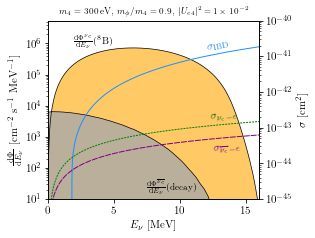

In [19]:
################################################################
# PLOTTING THE EVENT RATES 
fsize=11
rc('text', usetex=True)
rcparams={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.2*3.7,1.4*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth
rcParams.update(rcparams)
axes_form  = [0.15,0.15,0.66,0.75]

################
# FIGURE 2 axes
fig = plt.figure()
ax = fig.add_axes(axes_form)
ax2 = ax.twinx()
ax2.set_zorder(ax.get_zorder() + 1)
ax2.patch.set_visible(False)


E = np.linspace(0.000,16,1000)

################
# PLOT FLUXES
ax.fill_between(E, flux(E),flux(E)/np.max(flux(E))*0, facecolor='orange', edgecolor='None', alpha=0.6)
ax.plot(E, flux(E), color='black',lw=0.7, linestyle='-')

print(dNCASCADE)
ax.fill_between(bin_c-dx/2.0, dNCASCADE/dx*1e38, dNCASCADE/dNCASCADE, facecolor='darkgrey',edgecolor='None',lw=0.5, linestyle='-',alpha=0.8)
ax.plot(bin_c-dx/2.0, dNCASCADE/dx*1e38, color='black',lw=0.7, linestyle='-')

################
# PLOT XSEC
ax2.plot(E, xsecSV(E), color='dodgerblue',lw=1)
ax2.plot(E, xsec_nue_ES(E), color='green',lw=1, dashes=(2,1))
ax2.plot(E, xsec_nuebar_ES(E), color='purple',lw=1, dashes=(6,1))


##############
# STYLE
##############
ax.set_yscale('log')
ax2.set_yscale('log')

# LABELS
ax2.text(12,1.5e-41,r'$\sigma_{\rm IBD}$',color='dodgerblue', rotation=13	, fontsize=11)
ax2.text(12.3,1.7e-43,r'$\sigma_{\nu_e - e}$',color='darkgreen', rotation=5, fontsize=11)
ax2.text(12.5,2.3e-44,r'$\sigma_{\overline{\nu_e} - e}$',color='purple', rotation=5, fontsize=11)
ax.text(2,1e6,r'$\frac{{\rm d} \Phi^{\nu_e}}{{\rm d} E_\nu}  (^8{\rm B})$',color='black', rotation=0, fontsize=10)
ax.text(7.5,2e1,r'$\frac{{\rm d} \Phi^{\overline{\nu_e}}}{{\rm d} E_\nu}$({\small decay})',color='black', rotation=0, fontsize=10)

# title
if params.model == const.VECTOR:
    boson_string = r'$m_{Z^\prime}$'
    boson_file = 'vector'
elif params.model == const.SCALAR:
    boson_string = r'$m_\phi$'
    boson_file = 'scalar'

UEQSR = plot_tools.to_scientific_notation(params.Ue4**2)
ax.legend(loc='lower left',frameon=False,ncol=1,markerfirst=True)
ax.set_title(r'$m_4 = %.0f$ eV, '%(params.m4*1e9)+boson_string+r'$/m_4 = %.1f$,\, $|U_{e 4}|^2 = \,$'%(params.mBOSON/params.m4)+UEQSR, fontsize=9)

ax.set_xlim(np.min(E),np.max(E))
ax.set_ylim(1e1, const.B8FLUX_B16)
ax2.set_ylim(1e-45, 1e-40)

ax.set_ylabel(r'$\frac{{\rm d}\Phi}{{\rm d}E_\nu}$ \big[cm$^{-2}$ s$^{-1}$ MeV$^{-1}$\big]')
ax2.set_ylabel(r'$\sigma$ [cm$^2$]')
ax.set_xlabel(r'$E_\nu$ [MeV]')
fig.savefig('plots/Spectrum_'+boson_file+'_%.0f_MB_%.0f.pdf'%(params.m4*1e9,params.mBOSON*1e9),rasterized=True)